### Version info

In [1]:
#Import relevant libraries and define settings for plotting.
%matplotlib inline
import sys
print(sys.version)

import numpy as np
print('Numpy version:', np.__version__)

import pandas as pd
print('Pandas version:', pd.__version__)

import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib version:', mpl.__version__)

import seaborn as sns
print('Seaborn version:', sns.__version__)

import datetime
import time


3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy version: 1.16.5
Pandas version: 0.25.1
Matplotlib version: 3.1.1
Seaborn version: 0.9.0


# Hypothesis 
# 1a: Finding out the relationship between tipping rates adn the Pick up and Drop off locations. 
# 1b: Determining the most popular pick up and drop off locations in NYC.
# 1c: Analyzing if there's a correlation between tipping rates and the weekdays.

### Reading the NYC Uber Data

In [2]:
df_uber = pd.read_csv('C:/Users/dipik/Untitled Folder/uber_nyc_data.csv')

In [ ]:
df_uber.head()

### Reading the Yellow Cab Service NYC data for Jan 2019

In [2]:
df_yellowcab_2019 = pd.read_csv('C:/Users/dipik/Untitled Folder/yellow_tripdata_2019-01.csv')

In [3]:
df_yellowcab_2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


### Reading the Yellow Cab Service NYC data for Jan 2018

In [9]:
df_yellowcab_2018 = pd.read_csv('C:/Users/dipik/Untitled Folder/yellow_tripdata_2018-01.csv')

In [10]:
df_yellowcab_2018.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [ ]:
len(df_yellowcab_2018.VendorID.unique())

### Reading the Taxi Zone Lookup File 

In [5]:
df_taxi_zone_lookup = pd.read_csv('C:/Users/dipik/Untitled Folder/taxi+_zone_lookup.csv')

In [6]:
df_taxi_zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


### Reading the Yellow Cab Service NYC data for Jan 2017

In [7]:
df_yellowcab_2017 = pd.read_csv('C:/Users/dipik/Untitled Folder/yellow_tripdata_2017-01.csv')

In [8]:
df_yellowcab_2017.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


### Reading the FHV NYC data (Uber, Lyft, etc) for Jan 2017

In [12]:
df_fhv_2017 = pd.read_csv('C:/Users/dipik/Untitled Folder/fhv_tripdata_2017-01.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df_fhv_2017.head()

,Dispatching_base_num,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID
0,B00001,2017-01-01 00:30:00,NaN,NaN,NaN
1,B00001,2017-01-01 00:30:00,NaN,NaN,NaN
2,B00008,2017-01-01 00:50:00,NaN,NaN,NaN
3,B00009,2017-01-01 00:10:00,NaN,NaN,NaN
4,B00009,2017-01-01 00:50:00,NaN,NaN,NaN


### Check for missing or possibly erroneous data.

In [15]:
#Performing all the preprocessing and data cleaning on all the imported data sets
#This takes a while to run
print("NUMBER OF DUPLICATES FOR EACH DATA SET >>>>>>>>>>")
print("Yellow cabs in 2017: ")
print(len(df_yellowcab_2017[df_yellowcab_2017.duplicated() == True]))
print("Yellow cabs in 2018: ")
print(len(df_yellowcab_2018[df_yellowcab_2018.duplicated() == True]))
print("Yellow cabs in 2019: ")
print(len(df_yellowcab_2019[df_yellowcab_2019.duplicated() == True]))
print("FHV cabs in 2017: ")
print(len(df_fhv_2017[df_fhv_2017.duplicated() == True]))
print("Taxi Zone Lookup: ")
print(len(df_taxi_zone_lookup[df_taxi_zone_lookup.duplicated() == True]))
#print("Uber data: ")
#print(len(df_uber[df_uber.duplicated() == True]))

NUMBER OF DUPLICATES FOR EACH DATA SET >>>>>>>>>>
Yellow cabs in 2017: 
0
Yellow cabs in 2018: 
1
Yellow cabs in 2019: 
0
FHV cabs in 2017: 
1078790
Taxi Zone Lookup: 
0


### Handling the duplicate rows from each data set

In [16]:
#Creating copies of each of the data sets
copy_df_yellowcab_2017 = df_yellowcab_2017
copy_df_yellowcab_2018 = df_yellowcab_2018
copy_df_yellowcab_2019 = df_yellowcab_2019
copy_df_fhv_2017 = df_fhv_2017
copy_df_taxi_zone_lookup = df_taxi_zone_lookup
#copy_df_uber = df_uber

#Since there are some files with duplicate values, we need to eliminate them.
#Eliminating duplicates from the Yellow cabs in 2018
copy_df_yellowcab_2018.drop_duplicates(inplace = True) 
copy_df_yellowcab_2018.head()

#Eliminating duplicates from the FHV cabs in 2017
copy_df_fhv_2017.drop_duplicates(inplace = True) 
copy_df_fhv_2017.head()

print("Checking for duplicates again!")
print("Yellow cabs in 2018: ")
print(len(copy_df_yellowcab_2018[copy_df_yellowcab_2018.duplicated() == True]))

Checking for duplicates again!
Yellow cabs in 2018: 
0


### Finding and displaying the total null values in each of the datasets 

In [ ]:
print("Total null values per column in the Yellow cabs 2017 data: ")
print(copy_df_yellowcab_2017.isnull().sum()) 
print("Total null values per column in the Yellow cabs 2018 data: ")
print(copy_df_yellowcab_2018.isnull().sum()) 
print("Total null values per column in the Yellow cabs 2019 data: ")
print(copy_df_yellowcab_2019.isnull().sum()) 
print("Total null values per column in the FHV cabs 2017 data: ")

### Handling missing data and null values in each of the data sets. 

In [22]:
#Finding out records that have both PU location and DO location missing
dftest1 = copy_df_fhv_2017[copy_df_fhv_2017.PUlocationID.isnull() & copy_df_fhv_2017.DOlocationID.isnull()]

In [23]:
#Dropping common rows in both the data frames
#basically getting rid of rows that won't be of any use in the first hypothesis
#always work on the copy of the original dataframes to avoid data loss
df_fhv_2017_hypo1 = copy_df_fhv_2017
df_fhv_2017_hypo1.head()

x = pd.merge(df_fhv_2017_hypo1,dftest1, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [ ]:
print("Length before handling missing PU and DO locations: ")
print("FHV data 2017")
print(len(copy_df_fhv_2017))
print("Length after handling missing PU and DO locations: ")
print("FHV data 2017")
print(len(x))

### Merging each of the Yellow Taxi files with the Zone Location file 

In [19]:
copy_df_yellowcab_2019 = df_yellowcab_2019
copy_df_taxi_zone_lookup = df_taxi_zone_lookup
def leftmergeOnPU(ds1, ds2):
    merged= pd.merge(ds1, ds2, left_on='PULocationID', right_on='LocationID', how='left')
    return merged

In [20]:
#Merging all yellow cab data for 2017
yellow_merged2017 = leftmergeOnPU(copy_df_yellowcab_2017, copy_df_taxi_zone_lookup)
yellow_merged2017.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,LocationID,Borough,Zone,service_zone
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,...,0.0,0.5,2.00,0.0,0.3,15.30,263,Manhattan,Yorkville West,Yellow Zone
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,...,0.0,0.5,1.45,0.0,0.3,7.25,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,...,0.0,0.5,1.00,0.0,0.3,7.30,164,Manhattan,Midtown South,Yellow Zone
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,...,0.0,0.5,1.70,0.0,0.3,8.50,236,Manhattan,Upper East Side North,Yellow Zone
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,...,0.0,0.5,0.00,0.0,0.3,52.80,249,Manhattan,West Village,Yellow Zone


In [21]:
#Merging all yellow cab data for 2018
yellow_merged2018 = leftmergeOnPU(copy_df_yellowcab_2018, copy_df_taxi_zone_lookup)
yellow_merged2018.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,LocationID,Borough,Zone,service_zone
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,...,0.5,0.5,0.00,0.0,0.3,5.80,41,Manhattan,Central Harlem,Boro Zone
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,...,0.5,0.5,0.00,0.0,0.3,15.30,239,Manhattan,Upper West Side South,Yellow Zone
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,...,0.5,0.5,1.00,0.0,0.3,8.30,262,Manhattan,Yorkville East,Yellow Zone
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,...,0.5,0.5,0.00,0.0,0.3,34.80,140,Manhattan,Lenox Hill East,Yellow Zone
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,...,0.5,0.5,2.75,0.0,0.3,16.55,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone


In [30]:
#Merging all yellow cab data for 2019
yellow_merged2019 = leftmergeOnPU(copy_df_yellowcab_2019, copy_df_taxi_zone_lookup)
yellow_merged2019

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,LocationID,Borough,Zone,service_zone
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,...,0.5,1.65,0.0,0.3,9.95,NaN,151,Manhattan,Manhattan Valley,Yellow Zone
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,...,0.5,1.00,0.0,0.3,16.30,NaN,239,Manhattan,Upper West Side South,Yellow Zone
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,...,0.5,0.00,0.0,0.3,5.80,NaN,236,Manhattan,Upper East Side North,Yellow Zone
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,...,0.5,0.00,0.0,0.3,7.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,...,0.5,0.00,0.0,0.3,55.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,...,0.5,3.86,0.0,0.3,23.16,0.0,263,Manhattan,Yorkville West,Yellow Zone
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,...,0.0,0.00,0.0,0.0,0.00,0.0,193,Queens,Queensbridge/Ravenswood,Boro Zone
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,...,0.0,0.00,0.0,0.0,0.00,0.0,264,Unknown,NV,NaN
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,...,0.0,0.00,0.0,0.0,0.00,0.0,264,Unknown,NV,NaN


In [24]:
def leftmergeOnDO(ds1, ds2):
    merged= pd.merge(ds1, ds2, left_on='DOLocationID', right_on='LocationID', how='left')
    return merged

In [25]:
#Merging all yellow cab data for 2019 according to the drop off Location IDs
yellow_merged_DO_2019 = leftmergeOnDO(copy_df_yellowcab_2019, copy_df_taxi_zone_lookup)
yellow_merged_DO_2019

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,LocationID,Borough,Zone,service_zone
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,...,0.5,1.65,0.0,0.3,9.95,NaN,239,Manhattan,Upper West Side South,Yellow Zone
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,...,0.5,1.00,0.0,0.3,16.30,NaN,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,...,0.5,0.00,0.0,0.3,5.80,NaN,236,Manhattan,Upper East Side North,Yellow Zone
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,...,0.5,0.00,0.0,0.3,7.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,...,0.5,0.00,0.0,0.3,55.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,...,0.5,3.86,0.0,0.3,23.16,0.0,4,Manhattan,Alphabet City,Yellow Zone
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,...,0.0,0.00,0.0,0.0,0.00,0.0,193,Queens,Queensbridge/Ravenswood,Boro Zone
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,...,0.0,0.00,0.0,0.0,0.00,0.0,264,Unknown,NV,NaN
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,...,0.0,0.00,0.0,0.0,0.00,0.0,7,Queens,Astoria,Boro Zone


### Merging each of the FHV Taxi files with the Zone Location file

In [26]:
def leftmergeOnPU_FHV(ds1, ds2):
    merged= pd.merge(ds1, ds2, left_on='PUlocationID', right_on='LocationID', how='left')
    return merged

In [27]:
#Merging all FHV cab data for 2017
fhv_merged2017 = leftmergeOnPU_FHV(x, copy_df_taxi_zone_lookup)
fhv_merged2017.head()

,Dispatching_base_num,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,LocationID,Borough,Zone,service_zone
0,B00029,2017-01-01 00:56:00,NaN,174.0,NaN,174.0,Bronx,Norwood,Boro Zone
1,B00029,2017-01-01 00:01:00,NaN,3.0,NaN,3.0,Bronx,Allerton/Pelham Gardens,Boro Zone
2,B00029,2017-01-01 00:16:00,NaN,51.0,NaN,51.0,Bronx,Co-Op City,Boro Zone
3,B00029,2017-01-01 00:22:00,NaN,3.0,NaN,3.0,Bronx,Allerton/Pelham Gardens,Boro Zone
4,B00029,2017-01-01 00:46:00,NaN,185.0,NaN,185.0,Bronx,Pelham Parkway,Boro Zone


### Visualizing the most popular pick up and drop off location IDs for Yellow cab service data

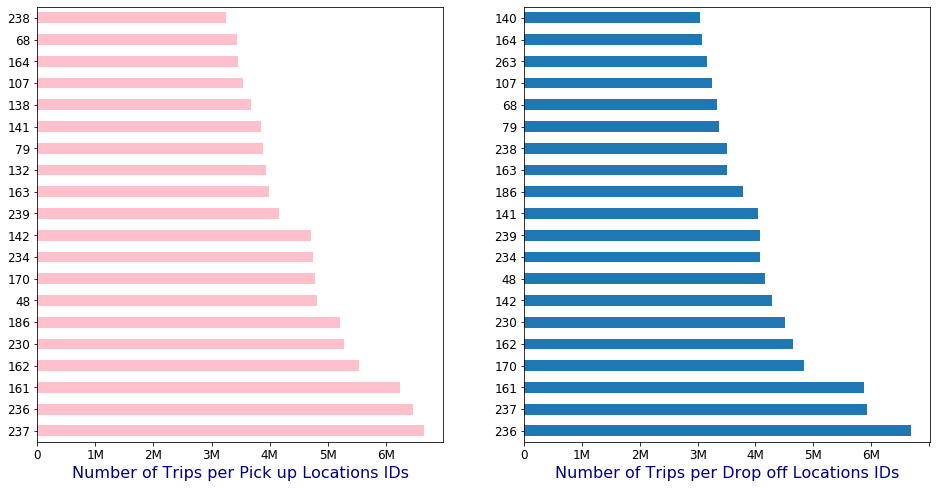

In [31]:
fig = plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
temp = yellow_merged2019.PULocationID.value_counts()
ax1 = temp[:20].plot(kind = 'barh', color = 'pink')
ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Pick up Locations IDs', fontsize = 16, color='navy')

plt.subplot(1,2,2) #note: it won't account missing values (4% of data)
temp2 = yellow_merged2019.DOLocationID.value_counts()
ax2 = temp2[:20].plot(kind = 'barh')
ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Drop off Locations IDs', fontsize = 16, color='navy')

plt.show()

### Visulaizing the most popular pick up and drop off locations (Boroughs) for Yellow cab service data

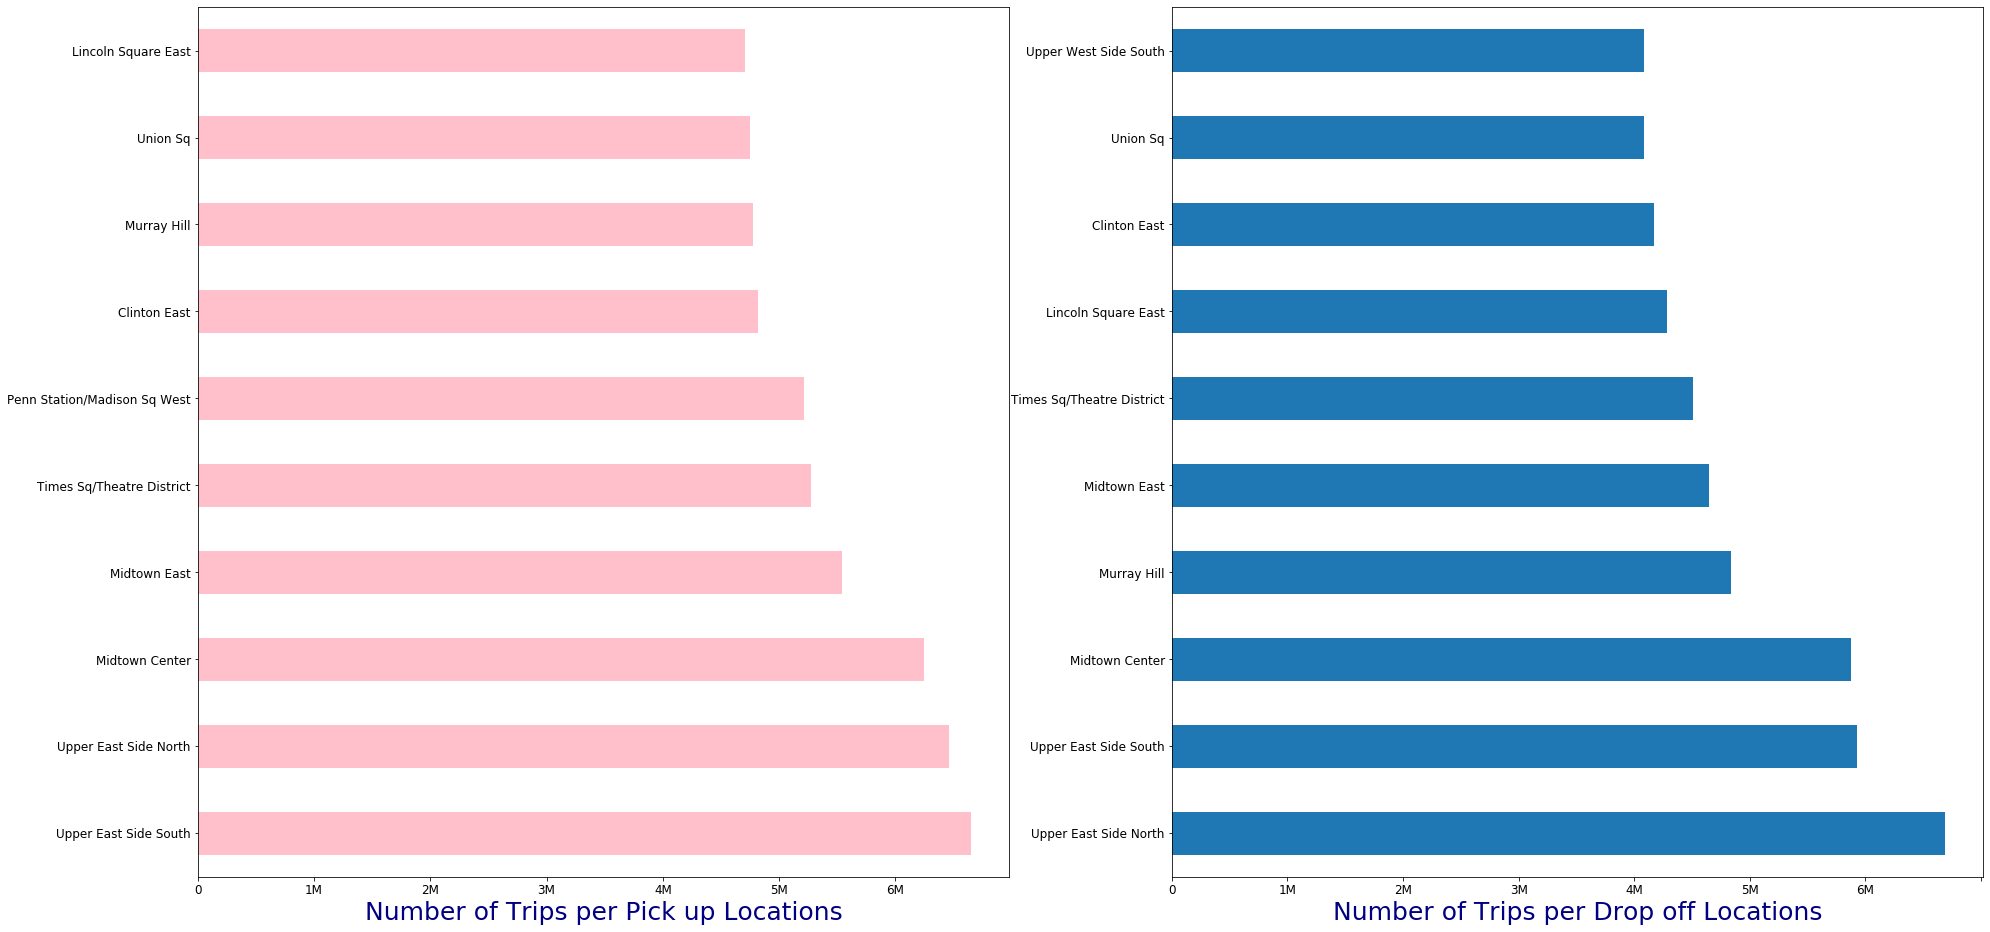

In [32]:
#Visulaizing the most popular pick up and drop off locations for Yellow cab service data
fig = plt.figure(figsize = (32,16))

plt.subplot(1,2,1)
temp = yellow_merged2019.Zone.value_counts()
ax1 = temp[:10].plot(kind = 'barh', color = 'pink')
ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Pick up Locations', fontsize = 25, color='navy')

plt.subplot(1,2,2) #note: it won't account missing values (4% of data)
temp2 = yellow_merged_DO_2019.Zone.value_counts()
ax2 = temp2[:10].plot(kind = 'barh')
ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Drop off Locations', fontsize = 25, color='navy')

plt.show()

### Parse the pickup_datetime column to datetime type and create related features.

In [33]:
#Finding out how many pickup time data offer minutes or seconds precision
len(copy_df_yellowcab_2019[copy_df_yellowcab_2019.tpep_pickup_datetime.apply(lambda x: x[-5:] == '00:00') == False])

7665650

In [34]:
#Finding out how many pickup time data offer minutes or seconds precision
len(copy_df_yellowcab_2019[copy_df_yellowcab_2019.tpep_dropoff_datetime.apply(lambda x: x[-5:] == '00:00') == False])

7664093

In [35]:
def dateParser(s):
    """
    Function that takes a string in the format yyyy-mm-dd hh:mm:ss, and
    returns the same as a datetime object.
    """
    return datetime.datetime(int(s[0:4]), int(s[5:7]), int(s[8:10]), int(s[11:13]))

#Other methods were tried, all slower (the slowest being parsing while reading file in Pandas):
#return datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%f")
#return np.datetime64(s) equivalent to: np.array(df_uber.pickup_datetime[0]).astype(np.datetime64)
#return pandas.Timestamp(s, "%Y-%m-%d %H:%M:%S.%f", tz='utc' )
#source: http://stackoverflow.com/questions/11136006/python-pandas-what-is-the-fastest-way-to-create-a-datetime-index

In [36]:
#Apply parser to pick up data
t0 = time.time()
copy_df_yellowcab_2019['pu_date_hour_PU'] = copy_df_yellowcab_2019.tpep_pickup_datetime.apply(dateParser)
time.time() - t0

9.462393522262573

In [37]:
#Apply parser to drop off data
t0 = time.time()
copy_df_yellowcab_2019['pu_date_hour_DO'] = copy_df_yellowcab_2019.tpep_dropoff_datetime.apply(dateParser)
time.time() - t0

9.98579740524292

In [40]:
#Data encompasses exactly 365 days from Sept 1st, 2014 to Sep 1st, 2015.
beginning = copy_df_yellowcab_2019.pu_date_hour_PU.min()
end = copy_df_yellowcab_2019.pu_date_hour_PU.max()
print(beginning, end, end - beginning)

2001-02-02 14:00:00 2088-01-24 00:00:00 31766 days 10:00:00


In [41]:
#Data encompasses exactly 365 days from Sept 1st, 2014 to Sep 1st, 2015.
beginning = copy_df_yellowcab_2019.pu_date_hour_DO.min()
end = copy_df_yellowcab_2019.pu_date_hour_DO.max()
print(beginning, end, end - beginning)

2001-02-02 15:00:00 2088-01-24 07:00:00 31766 days 16:00:00


### Create other date and time features.

In [42]:
t0 = time.time()
copy_df_yellowcab_2019['pu_date_PU'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), copy_df_yellowcab_2019['pu_date_hour_PU'].values))
time.time() - t0

12.106397151947021

In [43]:
#Create a column with the DO date, without the time. This will be useful later.
t0 = time.time()
copy_df_yellowcab_2019['pu_date_DO'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), copy_df_yellowcab_2019['pu_date_hour_DO'].values))
time.time() - t0

11.518587589263916

In [44]:
#Get month and year from pick up timestamp
copy_df_yellowcab_2019['year_PU'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.year
copy_df_yellowcab_2019['month_PU'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.month
copy_df_yellowcab_2019['year_DO'] = copy_df_yellowcab_2019['pu_date_hour_DO'].dt.year
copy_df_yellowcab_2019['month_DO'] = copy_df_yellowcab_2019['pu_date_hour_DO'].dt.month

In [45]:
#Get trip pick up day of the month
t0 = time.time()
copy_df_yellowcab_2019['day'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.day #.apply(lambda x: x.day) = 105 seconds vs < 2 seconds with dt
time.time() - t0

0.43877506256103516

In [46]:
#Get trip pick up hour from timestamp
t0 = time.time()
copy_df_yellowcab_2019['hour_PU'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.hour #< 2 seconds vs 101 seconds using apply lambda
time.time() - t0

0.45102715492248535

In [35]:
#Get trip drop off hour from timestamp
t0 = time.time()
copy_df_yellowcab_2019['hour_DO'] = copy_df_yellowcab_2019['pu_date_hour_DO'].dt.hour #< 2 seconds vs 101 seconds using apply lambda
time.time() - t0

0.4362015724182129

In [47]:
#Get trip pick up weekday from timestamp
t0 = time.time()
copy_df_yellowcab_2019['weekday'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.dayofweek
time.time() - t0

0.48807835578918457

In [48]:
copy_df_yellowcab_2019.weekday.value_counts() #Monday = 0, Sunday = 6

3    1351516
2    1259695
1    1203843
4    1082795
5    1007797
0     904512
6     857634
Name: weekday, dtype: int64

In [39]:
copy_df_yellowcab_2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pu_date_PU,pu_date_DO,year_PU,month_PU,year_DO,month_DO,day,hour_PU,hour_DO,weekday
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,2019-01-01,2019-01-01,2019,1,2019,1,1,0,0,1
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,2019-01-01,2019-01-01,2019,1,2019,1,1,0,1,1
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,...,2018-12-21,2018-12-21,2018,12,2018,12,21,13,13,4
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,...,2018-11-28,2018-11-28,2018,11,2018,11,28,15,15,2
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,...,2018-11-28,2018-11-28,2018,11,2018,11,28,15,15,2


### Analyzing if there's a correlation between tipping rates and the weekdays.

In [49]:
#Define robust function to automatically add annotated labels on bar plots.
#Inspiration from http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def annotate_labels(ax, labels_list, **kwargs):
    """
    Function to automatically add labels on bar charts.
    It takes a plot axis, an ordered list of labels, and text kwargs.
    """
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) # Fraction of axis height taken up by this rectangle
        label_position = height + (y_height * 0.01)
        
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column (or else, change ylim)
        #if p_height > 0.95:
        #    label_position = height - (y_height * 0.05)
        #else:
        #    label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
    return None

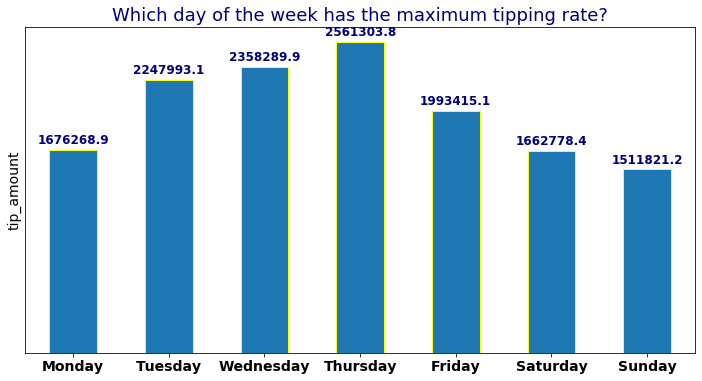

In [46]:
#Create plot. Does Saturday have better traffic flow than Monday?
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_plt2 = copy_df_yellowcab_2019.groupby('weekday')['tip_amount'].sum()
fig = plt.figure()
labels_list = df_plt2.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
ax.set_xticklabels(weekday_labels, weight='bold')
#ax.set_axis_bgcolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('tip_amount', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which day of the week has the maximum tipping rate?', fontsize = 18, color='navy')
plt.show()

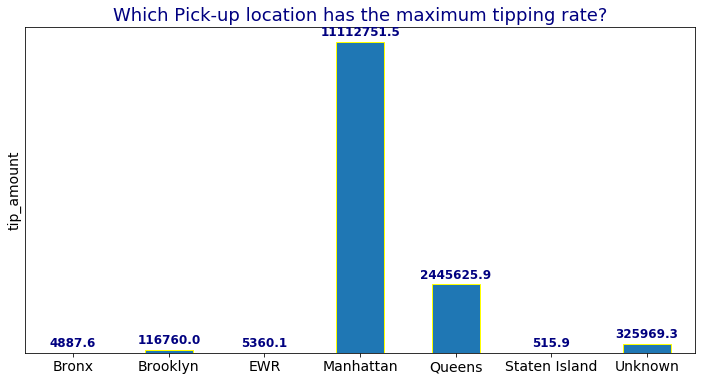

In [53]:
#Create plot. Does Saturday have better traffic flow than Monday?
#borough_list = yellow_merged2019.[]
df_plt2 = yellow_merged2019.groupby('Borough')['tip_amount'].sum()
fig = plt.figure()
labels_list = df_plt2.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
#ax.set_xticklabels(borough_list, weight='bold')
#ax.set_axis_bgcolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('tip_amount', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which Pick-up location has the maximum tipping rate?', fontsize = 18, color='navy')
plt.show()

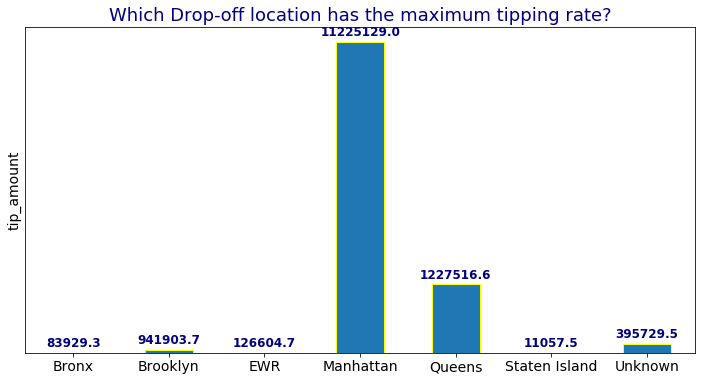

In [54]:
#Create plot. Does Saturday have better traffic flow than Monday?
#borough_list = yellow_merged2019.[]
df_plt3 = yellow_merged_DO_2019.groupby('Borough')['tip_amount'].sum()
fig = plt.figure()
labels_list = df_plt3.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('tip_amount', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which Drop-off location has the maximum tipping rate?', fontsize = 18, color='navy')
plt.show()

### Visualize the Pick up versus Drop off matrix via a heatmap:

In [56]:
#Define data to plot:
df_plt4 = yellow_merged2019.pivot_table(aggfunc='count', index='PULocationID', columns='DOLocationID')

In [57]:
df_plt4.shape

(263, 5220)

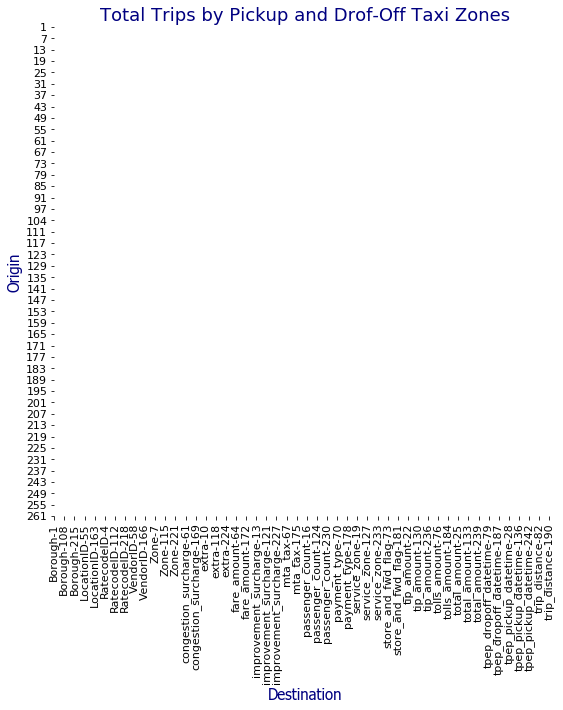

In [59]:
fig = plt.figure(figsize=(9,9))

cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.9, as_cmap=True) #'YlOrRd' #ggplot:'viridis'

sns.heatmap(df_plt4, cmap=cmap, linewidths=0.1, cbar=False)

plt.title('Total Trips by Pickup and Drof-Off Taxi Zones', fontsize=18, color='navy')
plt.xlabel('Destination', fontsize=15, fontname='Tahoma', color='navy')
plt.ylabel('Origin', fontsize=15, fontname='Tahoma', color='navy')
plt.tick_params(labelsize=11)
plt.show()